# Analisis Penjualan Global berdasarkan Platform dan Analisis Critic User menggunakan Algoritma Fuzzy pada Web VGCHARTZ

## Nama Kelompok :

### 1.Moch Ilham Afriandhi(06.2018.1.06943)
### 2.M Ihsan Nugroho(06.2018.1.07058)

In [602]:
#import library
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import csv
import matplotlib.pyplot as plt
import mysql.connector

In [603]:
#read data csv
data = pd.read_csv('Video_Games_Sales.csv', encoding='utf-8')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [604]:
#cleaning data NaN
data = data.dropna()
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [605]:
#convert data csv ke dalam array untuk pemisahan data
data_array = np.array(data)
sales_array = data_array[:,[5,6,7,8,9]]
score_array = data_array[:,[10,11,12,13]]
game_array =  data_array[:,[0,1,2,3,4,14,15]]

In [606]:
#simpan data array ke dalam file csv baru
with open('sales.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(sales_array)
    
with open('score.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(score_array)
    
with open('game.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(game_array)

In [607]:
#connect ke database
mydb = mysql.connector.connect(host="localhost",user="root",passwd="")
mycursor = mydb.cursor()

In [608]:
#buat database
mycursor.execute("DROP DATABASE if exists video_games_sales")
mycursor.execute("CREATE DATABASE video_games_sales")

In [609]:
#select database yang digunakan
mycursor.execute("use video_games_sales")

In [610]:
#buat tabel ke dalam database
mycursor.execute("DROP TABLE if exists sales")
mycursor.execute("DROP TABLE if exists score")
mycursor.execute("DROP TABLE if exists game")
mycursor.execute("create table sales(Id_Sales int auto_increment primary key, NA_Sales int, EU_Sales int, JP_Sales int, Other_Sales int, Global_Sales int)")
mycursor.execute("create table score(Id_Score int auto_increment primary key, Critic_Score int, Critic_Count int, User_Score int, User_Count int)")
mycursor.execute("create table game(Id_Game int auto_increment primary key, Id_Sales int, Id_Score int, Name varchar(50), Platform varchar(50), Year_of_Release varchar(4), Genre varchar(50), Publisher varchar(50), Developer varchar(50), Rating varchar(50))")

# Desain Database
## Schema Star
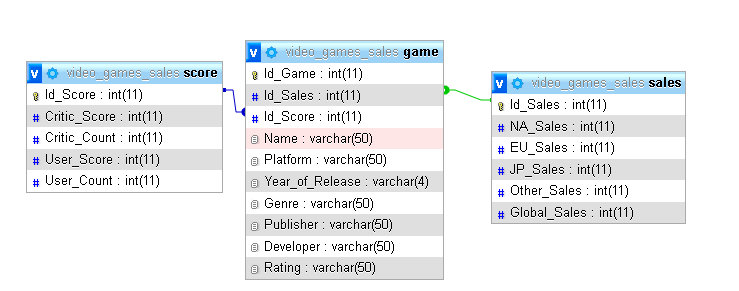

In [611]:
#read file csv untuk insert ke dalam database
csv_sales = csv.reader(open('sales.csv'))
csv_score = csv.reader(open('score.csv'))

In [612]:
#insert file csv ke table sales
mycursor.execute("TRUNCATE TABLE sales")
for row in csv_sales:
    sql = "INSERT INTO sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) VALUES (%s, %s, %s, %s, %s)"
    mycursor.execute(sql, row)
    mydb.commit()

In [613]:
#insert file csv ke table score
mycursor.execute("TRUNCATE TABLE score")
for row in csv_score:
    sql = "INSERT INTO score (Critic_Score, Critic_Count, User_Score, User_Count) VALUES (%s, %s, %s, %s)"
    mycursor.execute(sql, row)
    mydb.commit()

In [614]:
#insert file csv ke table game
mycursor.execute("TRUNCATE TABLE game")
for index, row in enumerate(game_array):
    mycursor.execute("INSERT INTO game VALUES (" + str(index+1) + ", " + str(index+1) + ", " + str(index+1) + ", '" + str(row[0]) + "', '" + str(row[1]) + "', '" + str(row[2]) + "', '" + str(row[3]) + "', '" + str(row[4]) + "', '" + str(row[5]) + "', '" + str(row[6]) + "')")
    mydb.commit()

In [615]:
#select table game
data_game = pd.read_sql("SELECT * FROM game", mydb)
data_game

,Id_Game,Id_Sales,Id_Score,Name,Platform,Year_of_Release,Genre,Publisher,Developer,Rating
0,1,1,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo,E
1,2,2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo,E
2,3,3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo,E
3,4,4,4,New Super Mario Bros.,DS,2006,Platform,Nintendo,Nintendo,E
4,5,5,5,Wii Play,Wii,2006,Misc,Nintendo,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...
6820,6821,6821,6821,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,Fluid Studios,E
6821,6822,6822,6822,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,Criterion Games,M
6822,6823,6823,6823,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,Kojima Productions,M
6823,6824,6824,6824,Breach,PC,2011,Shooter,Destineer,Atomic Games,T


In [617]:
#select table sales
data_sales = pd.read_sql("SELECT * FROM sales", mydb)
data_sales

,Id_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41,29,4,8,83
1,2,16,13,4,3,36
2,3,16,11,3,3,33
3,4,11,9,7,3,30
4,5,14,9,3,3,29
...,...,...,...,...,...,...
6820,6821,0,0,0,0,0
6821,6822,0,0,0,0,0
6822,6823,0,0,0,0,0
6823,6824,0,0,0,0,0


In [618]:
#select table score
data_score = pd.read_sql("SELECT * FROM score", mydb)
data_score

,Id_Score,Critic_Score,Critic_Count,User_Score,User_Count
0,1,76,51,8,322
1,2,82,73,8,709
2,3,80,73,8,192
3,4,89,65,9,431
4,5,58,41,7,129
...,...,...,...,...,...
6820,6821,46,4,2,21
6821,6822,81,12,9,9
6822,6823,80,20,8,412
6823,6824,61,12,6,43


In [619]:
#select join lalu diinputkan kedalam array
mycursor.execute('''SELECT game.Platform, AVG(sales.Global_Sales) as mean FROM game join sales on game.Id_Sales = sales.Id_Sales
                group by game.Platform
                order by mean DESC''')
mean_global = []
for row in mycursor.fetchall():
    mean_global.append(row)
np_global = np.array(mean_global)
data_global = pd.DataFrame([ x for x in np_global[:,:]])
data_global.columns = ['Platform', 'Global_Sales']
#data_global.index = np.arange(1,len(data_global)+1)
data_global = data_global.head(5)
data_global

,Platform,Global_Sales
0,PS,1.3467
1,Wii,1.3111
2,PS4,0.9623
3,PS3,0.9584
4,X360,0.9184


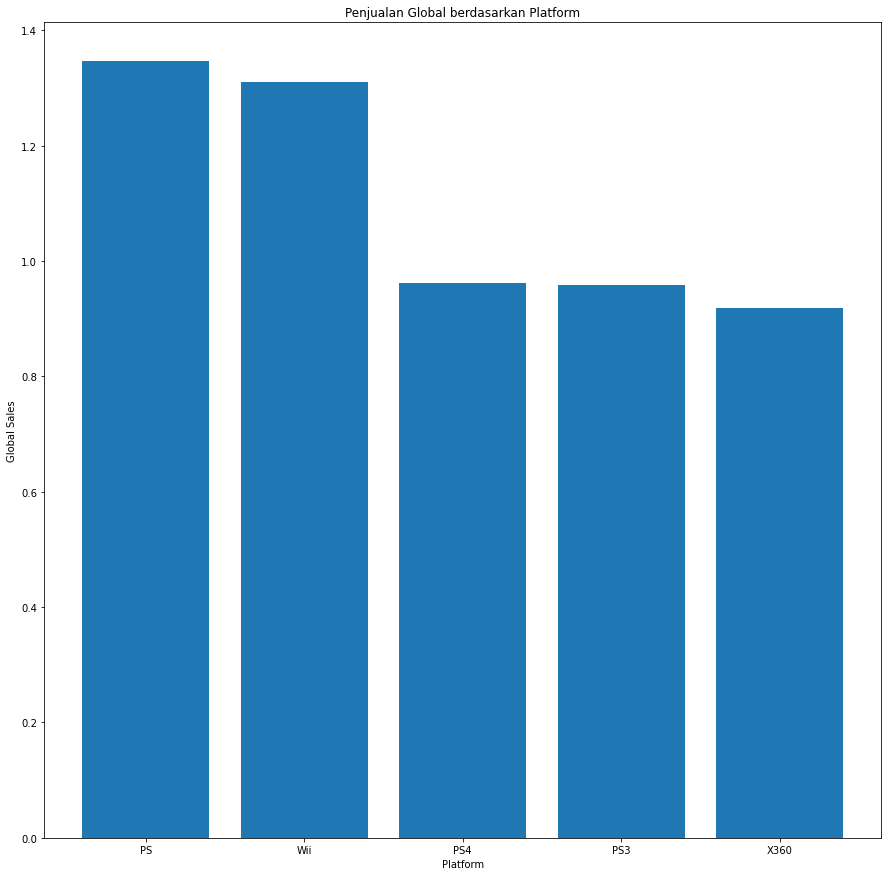

NB : Semakin tinggi bar semakin bagus nilainya


In [635]:
#buat grafik bar
plt.bar(data_global['Platform'], data_global['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title("Penjualan Global berdasarkan Platform")
plt.show()
print("NB : Semakin tinggi bar semakin bagus nilainya")

In [621]:
#select join lalu diinputkan kedalam array
mycursor.execute('''SELECT game.Name, score.Critic_Score*score.Critic_Count as crit FROM game join score on game.Id_Score = score.Id_Score
                group by game.Name
                order by crit DESC''')
score_critic = []
for row in mycursor.fetchall():
    score_critic.append(row)
np_critic = np.array(score_critic)
data_critic = pd.DataFrame([ x for x in np_critic[:,:]])
data_critic.columns = ['Name', 'Critic_Score']
data_critic.index = np.arange(1,len(data_critic)+1)
data_critic = data_critic.head(5)
data_critic 

,Name,Critic_Score
1,Uncharted 4: A Thiefs End,10509
2,Uncharted 2: Among Thieves,10080
3,Mass Effect 2,9408
4,Call of Duty: Modern Warfare 2,9400
5,The Last of Us,9310


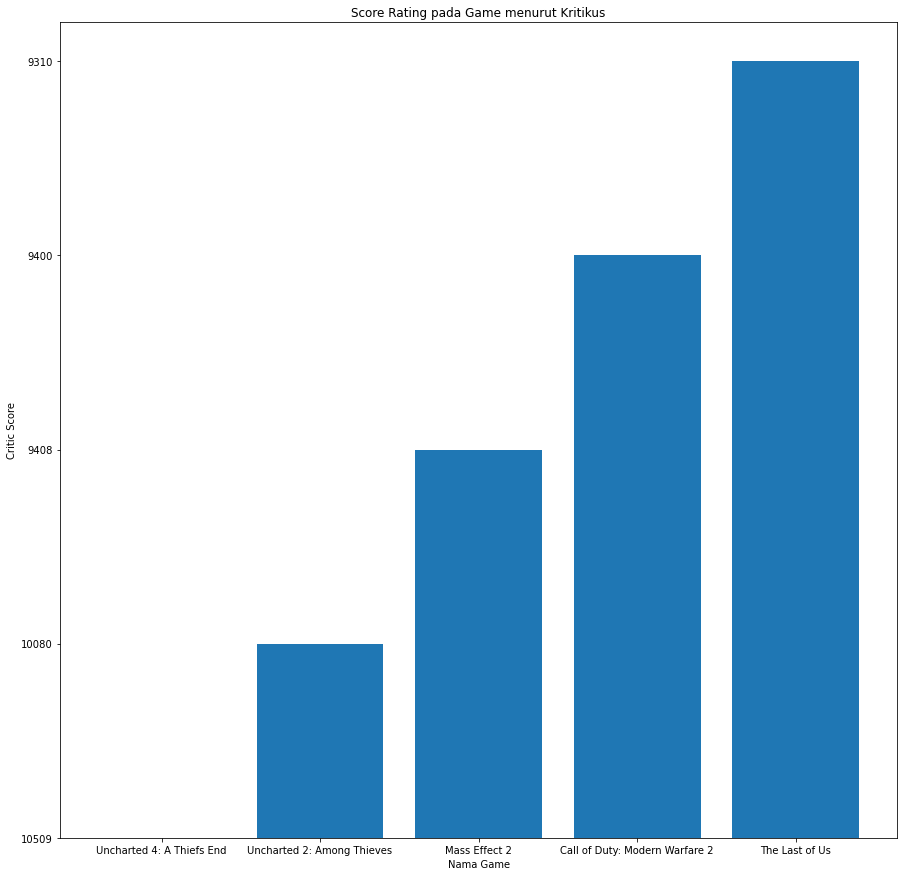

NB : Semakin rendah bar semakin bagus nilainya


In [636]:
#buat grafik bar
plt.bar(data_critic['Name'], data_critic['Critic_Score'])
plt.xlabel('Nama Game')
plt.ylabel('Critic Score')
plt.title("Score Rating pada Game menurut Kritikus")
plt.show()
print("NB : Semakin rendah bar semakin bagus nilainya")

In [626]:
#select join lalu diinputkan kedalam array
mycursor.execute('''SELECT game.Name, score.User_Score*score.User_Count as score FROM game join score on game.Id_Score = score.Id_Score
                group by game.Name
                order by score DESC''')
score_user = []
for row in mycursor.fetchall():
    score_user.append(row)
np_user = np.array(score_user)
data_user = pd.DataFrame([ x for x in np_user[:,:]])
data_user.columns = ['Name', 'User_Score']
data_user.index = np.arange(1,len(data_user)+1)
data_user = data_user.head(5)
data_user

,Name,User_Score
1,The Witcher 3: Wild Hunt,91611
2,Counter-Strike: Source,88659
3,Half-Life 2,77985
4,The Last of Us,72027
5,Bloodborne,57447


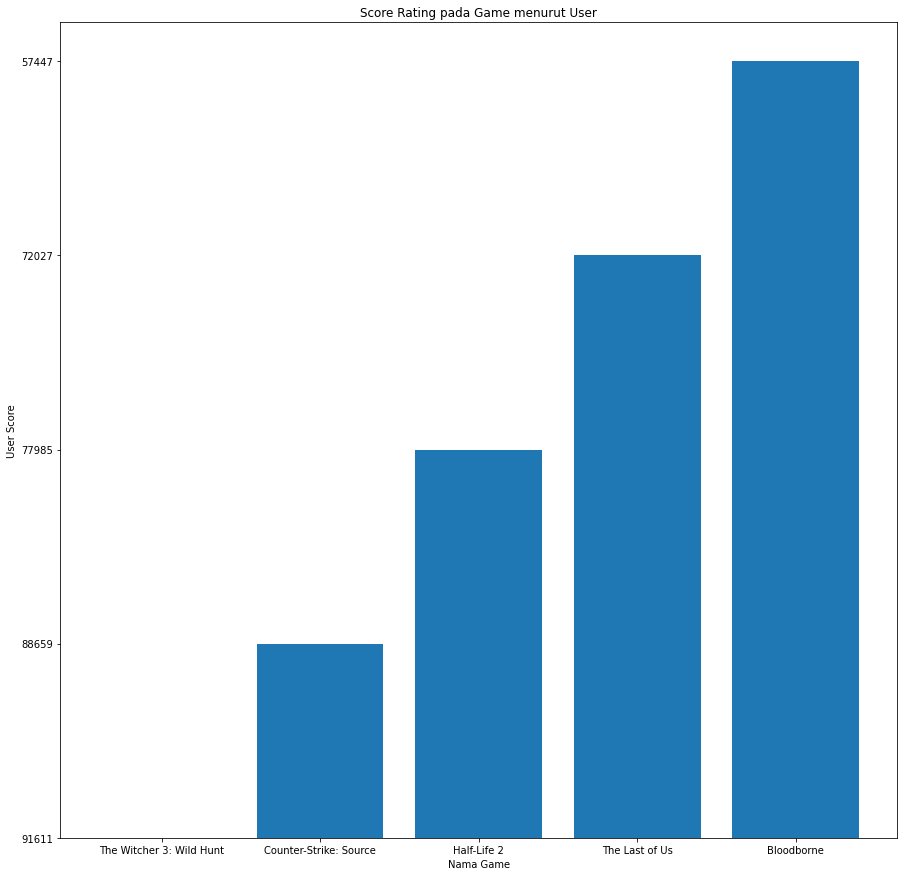

In [627]:
#buat grafik bar
plt.bar(data_user['Name'], data_user['User_Score'])
plt.xlabel('Nama Game')
plt.ylabel('User Score')
plt.title("Score Rating pada Game menurut User")
plt.show()
print("NB : Semakin rendah bar semakin bagus nilainya")

In [628]:
#convert to float, lalu dinput kedalam variabel
array_global = np.array(np_global)
array_global = array_global[:,[1]]
array_global = np.array(array_global).astype(np.float32)
global1 = np.sum(array_global[0], axis=0)
global2 = np.sum(array_global[1], axis=0)
global3 = np.sum(array_global[2], axis=0)
global4 = np.sum(array_global[3], axis=0)
global5 = np.sum(array_global[4], axis=0)

array_critic = np.array(np_critic)
array_critic = array_critic[:,[1]]
array_critic = np.array(array_critic).astype(np.float32)
critic1 = np.sum(array_critic[0], axis=0)
critic2 = np.sum(array_critic[1], axis=0)
critic3 = np.sum(array_critic[2], axis=0)
critic4 = np.sum(array_critic[3], axis=0)
critic5 = np.sum(array_critic[4], axis=0)

array_user = np.array(np_user)
array_user = array_user[:,[1]]
array_user = np.array(array_user).astype(np.float32)
user1 = np.sum(array_user[0], axis=0)
user2 = np.sum(array_user[1], axis=0)
user3 = np.sum(array_user[2], axis=0)
user4 = np.sum(array_user[3], axis=0)
user5 = np.sum(array_user[4], axis=0)

In [629]:
#fuzzifikasi
def Range(low, high, step):
    subjektif = np.arange(low, high, step)
    return subjektif

def Fuzzy(rule, range_subjektif, title):
    lo = fuzz.trimf(range_subjektif, rule[0])
    hi = fuzz.trimf(range_subjektif, rule[1])
    
    fig, ax = plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_subjektif, lo, 'r', linewidth=1.5, label = 'Untung')
    ax.plot(range_subjektif, hi, 'b', linewidth=1.5, label = 'Rugi')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout
    plt.show()
    
    return lo, hi

def Fuzzy2(rule, range_subjektif, title):
    lo = fuzz.trimf(range_subjektif, rule[0])
    mi = fuzz.trimf(range_subjektif, rule[1])
    hi = fuzz.trimf(range_subjektif, rule[2])
    
    fig, ax = plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_subjektif, lo, 'r', linewidth=1.5, label = 'Jelek')
    ax.plot(range_subjektif, mi, 'g', linewidth=1.5, label = 'Lumayan')
    ax.plot(range_subjektif, hi, 'b', linewidth=1.5, label = 'Mantap')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout
    plt.show()
    
    return lo, mi, hi

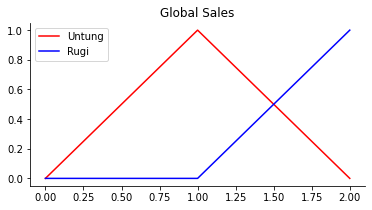

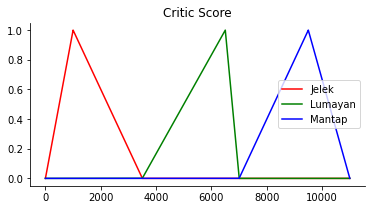

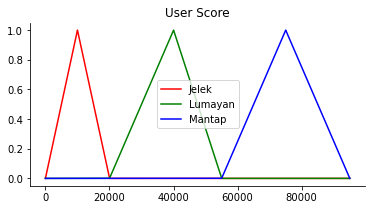

In [630]:
#fuzzifikasi
xrange = Range(0, 2.5, 1)
xrange_critic = Range(0, 11000, 1)
xrange_user = Range(0, 95000, 1)
rglobal_sales = np.array([
    [0, 1, 1.5],
    [1.5, 2, 2.5]
])

rcritic = np.array([
    [0, 1000, 3500],
    [3500, 6500, 7000],
    [7000, 9500, 11000]
])

ruser = np.array([
    [0, 10000, 20000],
    [20000, 40000, 55000],
    [55000, 75000, 95000]
])

lo_global, hi_global = Fuzzy(rglobal_sales, xrange, 'Global Sales')
lo_critic, mi_critic, hi_critic = Fuzzy2(rcritic, xrange_critic, 'Critic Score')
lo_user, mi_user, hi_user = Fuzzy2(ruser, xrange_user, 'User Score')

In [631]:
#defuzzifikasi
def FungsiKeanggotaan(jarak, lo, hi, nilai):
    lo = fuzz.interp_membership(jarak, lo, nilai)
    hi = fuzz.interp_membership(jarak, hi, nilai)
    return lo, hi

def FungsiKeanggotaan2(jarak, lo, mi, hi, nilai):
    lo = fuzz.interp_membership(jarak, lo, nilai)
    mi = fuzz.interp_membership(jarak, mi, nilai)
    hi = fuzz.interp_membership(jarak, hi, nilai)
    return lo, mi, hi

In [632]:
anggota_global1 = FungsiKeanggotaan(xrange, lo_global, hi_global, global1)
anggota_global2 = FungsiKeanggotaan(xrange, lo_global, hi_global, global2)
anggota_global3 = FungsiKeanggotaan(xrange, lo_global, hi_global, global3)
anggota_global4 = FungsiKeanggotaan(xrange, lo_global, hi_global, global4)
anggota_global5 = FungsiKeanggotaan(xrange, lo_global, hi_global, global5)

anggota_critic1 = FungsiKeanggotaan2(xrange_critic, lo_critic, mi_critic, hi_critic, critic1)
anggota_critic2 = FungsiKeanggotaan2(xrange_critic, lo_critic, mi_critic, hi_critic, critic2)
anggota_critic3 = FungsiKeanggotaan2(xrange_critic, lo_critic, mi_critic, hi_critic, critic3)
anggota_critic4 = FungsiKeanggotaan2(xrange_critic, lo_critic, mi_critic, hi_critic, critic4)
anggota_critic5 = FungsiKeanggotaan2(xrange_critic, lo_critic, mi_critic, hi_critic, critic5)

anggota_user1 = FungsiKeanggotaan2(xrange_user, lo_user, mi_user, hi_user, user1)
anggota_user2 = FungsiKeanggotaan2(xrange_user, lo_user, mi_user, hi_user, user2)
anggota_user3 = FungsiKeanggotaan2(xrange_user, lo_user, mi_user, hi_user, user3)
anggota_user4 = FungsiKeanggotaan2(xrange_user, lo_user, mi_user, hi_user, user4)
anggota_user5 = FungsiKeanggotaan2(xrange_user, lo_user, mi_user, hi_user, user5)

print("Anggota Global : ", anggota_global1, ",", anggota_global2, ",", anggota_global3, ",", anggota_global4, ",", anggota_global5)
print("Anggota Critic : ", anggota_critic1, ",", anggota_critic2, ",", anggota_critic3, ",", anggota_critic4, ",", anggota_critic5)
print("Anggota User : ", anggota_user1, ",", anggota_user2, ",", anggota_user3, ",", anggota_user4, ",", anggota_user5)

Anggota Global :  (0.6533000469207764, 0.34669995307922363) , (0.6888999938964844, 0.3111000061035156) , (0.9623000025749207, 0.0) , (0.9584000110626221, 0.0) , (0.91839998960495, 0.0)
Anggota Critic :  (0.0, 0.0, 0.3273333333333333) , (0.0, 0.0, 0.6133333333333333) , (0.0, 0.0, 0.9632) , (0.0, 0.0, 0.96) , (0.0, 0.0, 0.924)
Anggota User :  (0.0, 0.0, 0.16945) , (0.0, 0.0, 0.31705) , (0.0, 0.0, 0.85075) , (0.0, 0.0, 0.85135) , (0.0, 0.0, 0.12235)


In [633]:
#Buat status untuk memperjelas fuzzifikasi
def status(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1] and keanggotaan[0] > keanggotaan[2]:
        status = "Jelek"
    elif keanggotaan[1] > keanggotaan[0] and keanggotaan[1] > keanggotaan[2]:
        status = "Lumayan"
    elif keanggotaan[2] > keanggotaan[0] and keanggotaan[2] > keanggotaan[1]:
        status = "Mantap"
        
    return status

def status2(keanggotaan):
    status2 = ""
    if keanggotaan[0] > keanggotaan[1]:
        status2 = "Rugi"
    elif keanggotaan[1] > keanggotaan[0]:
        status2 = "Untung"
        
    return status2

In [634]:
#ouput status
status_global1 = status2(anggota_global1)
status_global2 = status2(anggota_global2)
status_global3 = status2(anggota_global3)
status_global4 = status2(anggota_global4)
status_global5 = status2(anggota_global5)

status_critic1 = status(anggota_critic1)
status_critic2 = status(anggota_critic2)
status_critic3 = status(anggota_critic3)
status_critic4 = status(anggota_critic4)
status_critic5 = status(anggota_critic5)

status_user1 = status(anggota_user1)
status_user2 = status(anggota_user2)
status_user3 = status(anggota_user3)
status_user4 = status(anggota_user4)
status_user5 = status(anggota_user5)

print("Status Global : ", status_global1, ",", status_global2, ",", status_global3, ",", status_global4, ",", status_global5)
print("Status Critic : ", status_critic1, ",", status_critic2, ",", status_critic3, ",", status_critic4, ",", status_critic5)
print("Status User : ", status_user1, ",", status_user2, ",", status_user3, ",", status_user4, ",", status_user5)

Anggota Global :  Rugi , Rugi , Rugi , Rugi , Rugi
Anggota Critic :  Mantap , Mantap , Mantap , Mantap , Mantap
Anggota User :  Mantap , Mantap , Mantap , Mantap , Mantap
